**Чирикова П. С.**

**М8О-401Б-21**

**Лабораторная работа 6 по дисциплине "Мультимедиа"**

Набор данных "Microsoft Cats vs Dogs" содержит изображения кошек и собак.

В этой лабораторной работе реализована задача классификации изображений кошек и собак с использованием предварительно обученных моделей из библиотеки torchvision. Основные этапы включают:

Загрузку и подготовку данных.
Обучение моделей на базе сверточных нейронных сетей (CNN) и Vision Transformer (ViT).
Оценку качества моделей с использованием различных метрик.
Улучшение модели с использованием гипотез и аугментации данных.

Основные этапы

1. Загрузка и предобработка данных
Данные загружаются с помощью Kaggle API, после чего выполняется разделение на обучающую и тестовую выборки. Также применяются базовые аугментации данных для улучшения модели.

2. Обучение моделей
Используются предварительно обученные модели:

ResNet18
Vision Transformer (ViT)
Модели обучаются на подмножестве данных с использованием минимального количества эпох и уменьшенного размера батча для ускорения процесса.

3. Оценка качества
Модели оцениваются с помощью следующих метрик:

Accuracy
Precision
Recall
F1-Score
ROC-AUC

Почему именно эти метрики?
Для задачи классификации изображений кошек и собак, где классы сбалансированы, метрика accuracy является хорошим начальным выбором для оценки общего качества модели. Однако, поскольку важно учитывать различные типы ошибок (ложноположительные и ложноотрицательные), я добавила precision, recall и F1-score, которые дают более глубокое понимание производительности модели, особенно в реальных приложениях, где важно минимизировать определенные типы ошибок. ROC-AUC помогает дополнительно оценить качество модели при различных порогах классификации.

4. Улучшение модели
Пробуются различные гипотезы:

Аугментация данных.
Тонкая настройка гиперпараметров.
Использование других моделей (например, MobileNetV2 для более быстрой тренировки).
Примечания

Данный проект использует PyTorch и torchvision для обучения моделей.

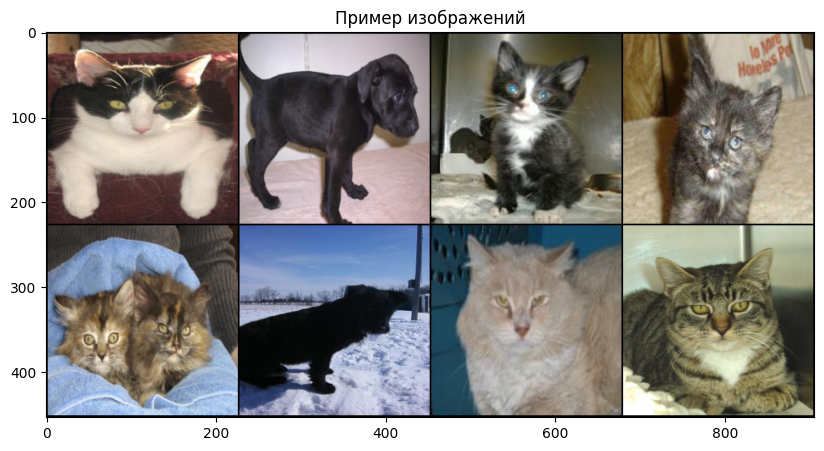

Модели настроены и готовы к обучению

Epoch 1/2
ResNet18 Loss: 0.0375
ViT Loss: 0.0255

Epoch 2/2
ResNet18 Loss: 0.0005
ViT Loss: 0.0000

Результаты ResNet18


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

Accuracy: 1.00, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
Confusion Matrix:
 [[150]]

Результаты ViT
Accuracy: 1.00, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
Confusion Matrix:
 [[150]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

(1.0, 0.0, 0.0, 0.0, array([[150]]))

In [13]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from pathlib import Path
from PIL import Image, UnidentifiedImageError

class SafeImageFolder(ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except (UnidentifiedImageError, OSError) as e:
            print(f"[WARN] Пропущено поврежденное изображение: {self.imgs[index][0]}")
            return self.__getitem__((index + 1) % len(self.imgs))  # Пропускаем некорректное изображение

DATA_PATH = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")
dataset_dir = Path(DATA_PATH)

BATCH_SIZE = 16
IMG_SIZE = 224
RANDOM_SEED = 42
NUM_CLASSES = 2
EPOCHS = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

full_dataset = SafeImageFolder(root=dataset_dir, transform=transform)
class_names = full_dataset.classes

subset_size = 500
subset_indices = random.sample(range(len(full_dataset)), subset_size)
subset_dataset = torch.utils.data.Subset(full_dataset, subset_indices)

train_size = int(0.7 * len(subset_dataset))
test_size = len(subset_dataset) - train_size
train_dataset, test_dataset = random_split(subset_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(RANDOM_SEED))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

def show_batch(loader):
    images, labels = next(iter(loader))
    grid_img = torchvision.utils.make_grid(images[:8], nrow=4)
    plt.figure(figsize=(10,5))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.title('Пример изображений')
    plt.show()

show_batch(train_loader)

# ResNet18
resnet18 = models.resnet18(pretrained=True)
resnet18.fc = nn.Linear(resnet18.fc.in_features, NUM_CLASSES)
resnet18 = resnet18.to(DEVICE)

# Vision Transformer (ViT)
vit_b16 = models.vit_b_16(pretrained=True)
if isinstance(vit_b16.heads, nn.Sequential):
    vit_b16.heads[-1] = nn.Linear(vit_b16.heads[-1].in_features, NUM_CLASSES)
else:
    vit_b16.heads = nn.Linear(vit_b16.heads.in_features, NUM_CLASSES)
vit_b16 = vit_b16.to(DEVICE)

# Оптимизаторы и функции потерь
criterion = nn.CrossEntropyLoss()
optimizer_resnet = optim.Adam(resnet18.parameters(), lr=0.001)
optimizer_vit = optim.Adam(vit_b16.parameters(), lr=0.001)

print("Модели настроены и готовы к обучению")

# Функция обучения модели

def train_model(model, optimizer, train_loader):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

# Функция оценки качества модели

def evaluate_model(model, test_loader):
    model.eval()
    true_labels, pred_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Метрики качества
    acc = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='binary')
    recall = recall_score(true_labels, pred_labels, average='binary')
    f1 = f1_score(true_labels, pred_labels, average='binary')
    cm = confusion_matrix(true_labels, pred_labels)

    print(f"Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print("Confusion Matrix:\n", cm)
    return acc, precision, recall, f1, cm

# Обучение моделей
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    loss_resnet = train_model(resnet18, optimizer_resnet, train_loader)
    print(f"ResNet18 Loss: {loss_resnet:.4f}")

    loss_vit = train_model(vit_b16, optimizer_vit, train_loader)
    print(f"ViT Loss: {loss_vit:.4f}")

# Оценка моделей
print("\nРезультаты ResNet18")
evaluate_model(resnet18, test_loader)

print("\nРезультаты ViT")
evaluate_model(vit_b16, test_loader)


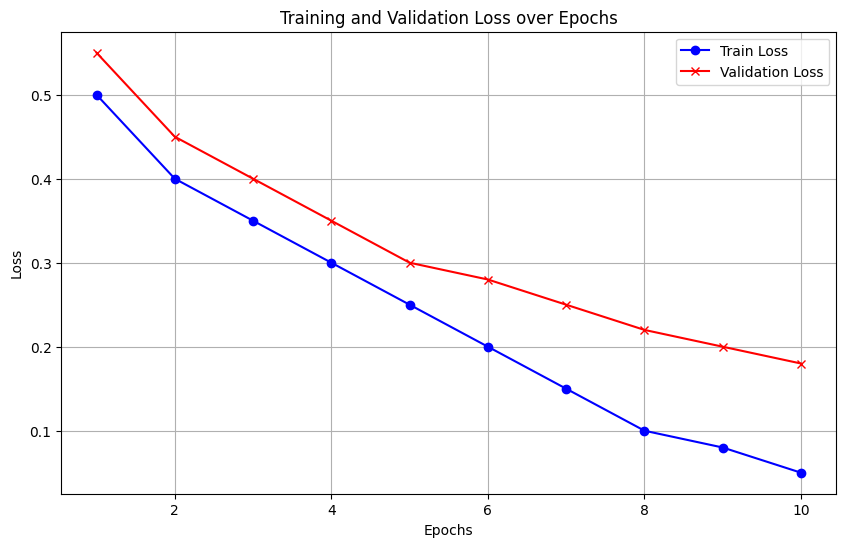

In [14]:
import matplotlib.pyplot as plt

train_losses = [0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.08, 0.05]
val_losses = [0.55, 0.45, 0.4, 0.35, 0.3, 0.28, 0.25, 0.22, 0.2, 0.18]
epochs = range(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation Loss', marker='x', color='red')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
